In [ ]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import seaborn as sns
import numpy as np
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from sklearn import metrics
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [ ]:
# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded

In [ ]:
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    print('File Path : ',filepath)
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [ ]:
# load all train
X_train, Y_train = load_dataset_group('train', '/content/drive/MyDrive/uci-har dataset/UCI HAR Dataset/')
# load all test
X_test, Y_test = load_dataset_group('test', '/content/drive/MyDrive/uci-har dataset/UCI HAR Dataset/')

# zero-offset class values
Y_train = Y_train - 1
Y_test = Y_test - 1
# one hot encode y
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print('X_train.shape : ', X_train.shape)
print('Y_train.shape : ', Y_train.shape)
print('X_test.shape : ', X_test.shape)
print('Y_test.shape : ', Y_test.shape)

File Path :  /content/drive/MyDrive/uci-har dataset/UCI HAR Dataset/train/Inertial Signals/
File Path :  /content/drive/MyDrive/uci-har dataset/UCI HAR Dataset/test/Inertial Signals/
X_train.shape :  (7352, 128, 9)
Y_train.shape :  (7352, 6)
X_test.shape :  (2947, 128, 9)
Y_test.shape :  (2947, 6)


In [ ]:
verbose = 1
epochs = 50
batch_size = 20

n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]
n_outputs = Y_train.shape[1]

In [ ]:
checkpoint = ModelCheckpoint("har_weights.h5", monitor='val_acc', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding = 'same'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=epochs, batch_size=batch_size, callbacks = [checkpoint], verbose=verbose)


# evaluate model
(loss, accuracy) = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=verbose)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))


Epoch 1/50
368/368 [==============================] - ETA: 0s - loss: 0.3378 - accuracy: 0.8658

368/368 [==============================] - 14s 9ms/step - loss: 0.3378 - accuracy: 0.8658 - val_loss: 0.4721 - val_accuracy: 0.8802
Epoch 2/50
363/368 [============================>.] - ETA: 0s - loss: 0.1373 - accuracy: 0.9442

368/368 [==============================] - 2s 5ms/step - loss: 0.1367 - accuracy: 0.9446 - val_loss: 0.3911 - val_accuracy: 0.9040
Epoch 3/50
368/368 [==============================] - ETA: 0s - loss: 0.1225 - accuracy: 0.9505

368/368 [==============================] - 3s 7ms/step - loss: 0.1225 - accuracy: 0.9505 - val_loss: 0.4311 - val_accuracy: 0.9030
Epoch 4/50
364/368 [============================>.] - ETA: 0s - loss: 0.1103 - accuracy: 0.9508

368/368 [==============================] - 4s 11ms/step - loss: 0.1107 - accuracy: 0.9506 - val_loss: 0.2914 - val_accuracy: 0.9050
Epoch 5/50
363/368 [============================>.] - ETA: 0s - loss: 0.1047 - accuracy: 0.9534

368/368 [==============================] - 4s 12ms/step - loss: 0.1044 - accuracy: 0.9536 - val_loss: 0.2968 - val_accuracy: 0.9108
Epoch 6/50
365/368 [============================>.] - ETA: 0s - loss: 0.0981 - accuracy: 0.9545

368/368 [==============================] - 4s 10ms/step - loss: 0.0982 - accuracy: 0.9544 - val_loss: 0.3688 - val_accuracy: 0.9131
Epoch 7/50
366/368 [============================>.] - ETA: 0s - loss: 0.0981 - accuracy: 0.9552

368/368 [==============================] - 2s 7ms/step - loss: 0.0982 - accuracy: 0.9551 - val_loss: 0.3533 - val_accuracy: 0.9118
Epoch 8/50
364/368 [============================>.] - ETA: 0s - loss: 0.0841 - accuracy: 0.9613

368/368 [==============================] - 2s 6ms/step - loss: 0.0842 - accuracy: 0.9612 - val_loss: 0.3456 - val_accuracy: 0.8975
Epoch 9/50
368/368 [==============================] - ETA: 0s - loss: 0.0816 - accuracy: 0.9616

368/368 [==============================] - 2s 6ms/step - loss: 0.0816 - accuracy: 0.9616 - val_loss: 0.3851 - val_accuracy: 0.9074
Epoch 10/50
368/368 [==============================] - ETA: 0s - loss: 0.1157 - accuracy: 0.9555

368/368 [==============================] - 3s 7ms/step - loss: 0.1157 - accuracy: 0.9555 - val_loss: 0.2707 - val_accuracy: 0.9175
Epoch 11/50
364/368 [============================>.] - ETA: 0s - loss: 0.0800 - accuracy: 0.9630

368/368 [==============================] - 3s 7ms/step - loss: 0.0798 - accuracy: 0.9631 - val_loss: 0.2932 - val_accuracy: 0.9114
Epoch 12/50
357/368 [============================>.] - ETA: 0s - loss: 0.0696 - accuracy: 0.9667

368/368 [==============================] - 2s 6ms/step - loss: 0.0701 - accuracy: 0.9667 - val_loss: 0.2847 - val_accuracy: 0.9108
Epoch 13/50
357/368 [============================>.] - ETA: 0s - loss: 0.0672 - accuracy: 0.9690

368/368 [==============================] - 2s 6ms/step - loss: 0.0681 - accuracy: 0.9687 - val_loss: 0.3358 - val_accuracy: 0.9077
Epoch 14/50
368/368 [==============================] - ETA: 0s - loss: 0.0641 - accuracy: 0.9699

368/368 [==============================] - 2s 6ms/step - loss: 0.0641 - accuracy: 0.9699 - val_loss: 0.3590 - val_accuracy: 0.9077
Epoch 15/50
365/368 [============================>.] - ETA: 0s - loss: 0.0596 - accuracy: 0.9719

368/368 [==============================] - 2s 5ms/step - loss: 0.0595 - accuracy: 0.9720 - val_loss: 0.4360 - val_accuracy: 0.9118
Epoch 16/50
363/368 [============================>.] - ETA: 0s - loss: 0.0568 - accuracy: 0.9733

368/368 [==============================] - 3s 7ms/step - loss: 0.0570 - accuracy: 0.9732 - val_loss: 0.3315 - val_accuracy: 0.8996
Epoch 17/50
367/368 [============================>.] - ETA: 0s - loss: 0.0838 - accuracy: 0.9674

368/368 [==============================] - 3s 7ms/step - loss: 0.0837 - accuracy: 0.9675 - val_loss: 0.4733 - val_accuracy: 0.8921
Epoch 18/50
359/368 [============================>.] - ETA: 0s - loss: 0.0868 - accuracy: 0.9723

368/368 [==============================] - 2s 6ms/step - loss: 0.0861 - accuracy: 0.9724 - val_loss: 0.4374 - val_accuracy: 0.9006
Epoch 19/50
357/368 [============================>.] - ETA: 0s - loss: 0.0555 - accuracy: 0.9754

368/368 [==============================] - 2s 5ms/step - loss: 0.0551 - accuracy: 0.9755 - val_loss: 0.5529 - val_accuracy: 0.9009
Epoch 20/50
360/368 [============================>.] - ETA: 0s - loss: 0.0520 - accuracy: 0.9781

368/368 [==============================] - 2s 6ms/step - loss: 0.0516 - accuracy: 0.9781 - val_loss: 0.5510 - val_accuracy: 0.9013
Epoch 21/50
365/368 [============================>.] - ETA: 0s - loss: 0.0500 - accuracy: 0.9789

368/368 [==============================] - 2s 6ms/step - loss: 0.0505 - accuracy: 0.9785 - val_loss: 0.6239 - val_accuracy: 0.9006
Epoch 22/50
364/368 [============================>.] - ETA: 0s - loss: 0.0477 - accuracy: 0.9760

368/368 [==============================] - 3s 7ms/step - loss: 0.0474 - accuracy: 0.9761 - val_loss: 0.5928 - val_accuracy: 0.9023
Epoch 23/50
358/368 [============================>.] - ETA: 0s - loss: 0.0503 - accuracy: 0.9782

368/368 [==============================] - 3s 7ms/step - loss: 0.0506 - accuracy: 0.9777 - val_loss: 0.6281 - val_accuracy: 0.9030
Epoch 24/50
363/368 [============================>.] - ETA: 0s - loss: 0.0806 - accuracy: 0.9719

368/368 [==============================] - 2s 6ms/step - loss: 0.0809 - accuracy: 0.9718 - val_loss: 0.4357 - val_accuracy: 0.9080
Epoch 25/50
364/368 [============================>.] - ETA: 0s - loss: 0.0444 - accuracy: 0.9790

368/368 [==============================] - 2s 6ms/step - loss: 0.0446 - accuracy: 0.9789 - val_loss: 0.4270 - val_accuracy: 0.9206
Epoch 26/50
362/368 [============================>.] - ETA: 0s - loss: 0.0439 - accuracy: 0.9790

368/368 [==============================] - 2s 5ms/step - loss: 0.0440 - accuracy: 0.9791 - val_loss: 0.4287 - val_accuracy: 0.9053
Epoch 27/50
361/368 [============================>.] - ETA: 0s - loss: 0.0395 - accuracy: 0.9824

368/368 [==============================] - 2s 6ms/step - loss: 0.0396 - accuracy: 0.9825 - val_loss: 0.4221 - val_accuracy: 0.9216
Epoch 28/50
361/368 [============================>.] - ETA: 0s - loss: 0.0376 - accuracy: 0.9819

368/368 [==============================] - 3s 7ms/step - loss: 0.0378 - accuracy: 0.9818 - val_loss: 0.4637 - val_accuracy: 0.9233
Epoch 29/50
357/368 [============================>.] - ETA: 0s - loss: 0.0386 - accuracy: 0.9821

368/368 [==============================] - 3s 7ms/step - loss: 0.0388 - accuracy: 0.9820 - val_loss: 0.5231 - val_accuracy: 0.9091
Epoch 30/50
367/368 [============================>.] - ETA: 0s - loss: 0.0649 - accuracy: 0.9766

368/368 [==============================] - 2s 5ms/step - loss: 0.0649 - accuracy: 0.9766 - val_loss: 0.4055 - val_accuracy: 0.9070
Epoch 31/50
367/368 [============================>.] - ETA: 0s - loss: 0.0367 - accuracy: 0.9812

368/368 [==============================] - 2s 6ms/step - loss: 0.0367 - accuracy: 0.9812 - val_loss: 0.4600 - val_accuracy: 0.9216
Epoch 32/50
367/368 [============================>.] - ETA: 0s - loss: 0.0325 - accuracy: 0.9856

368/368 [==============================] - 3s 7ms/step - loss: 0.0324 - accuracy: 0.9856 - val_loss: 0.4123 - val_accuracy: 0.9114
Epoch 33/50
367/368 [============================>.] - ETA: 0s - loss: 0.0329 - accuracy: 0.9856

368/368 [==============================] - 3s 7ms/step - loss: 0.0329 - accuracy: 0.9856 - val_loss: 0.5359 - val_accuracy: 0.9172
Epoch 34/50
363/368 [============================>.] - ETA: 0s - loss: 0.0324 - accuracy: 0.9857

368/368 [==============================] - 4s 10ms/step - loss: 0.0324 - accuracy: 0.9857 - val_loss: 0.4548 - val_accuracy: 0.9237
Epoch 35/50
360/368 [============================>.] - ETA: 0s - loss: 0.0276 - accuracy: 0.9885

368/368 [==============================] - 3s 7ms/step - loss: 0.0284 - accuracy: 0.9880 - val_loss: 0.4520 - val_accuracy: 0.9077
Epoch 36/50
365/368 [============================>.] - ETA: 0s - loss: 0.0274 - accuracy: 0.9881

368/368 [==============================] - 2s 6ms/step - loss: 0.0274 - accuracy: 0.9880 - val_loss: 0.5445 - val_accuracy: 0.9179
Epoch 37/50
366/368 [============================>.] - ETA: 0s - loss: 0.0290 - accuracy: 0.9885

368/368 [==============================] - 2s 5ms/step - loss: 0.0293 - accuracy: 0.9884 - val_loss: 0.5193 - val_accuracy: 0.9131
Epoch 38/50
367/368 [============================>.] - ETA: 0s - loss: 0.0545 - accuracy: 0.9823

368/368 [==============================] - 2s 5ms/step - loss: 0.0544 - accuracy: 0.9823 - val_loss: 0.5511 - val_accuracy: 0.9060
Epoch 39/50
363/368 [============================>.] - ETA: 0s - loss: 0.0266 - accuracy: 0.9883

368/368 [==============================] - 3s 7ms/step - loss: 0.0264 - accuracy: 0.9883 - val_loss: 0.5931 - val_accuracy: 0.9097
Epoch 40/50
358/368 [============================>.] - ETA: 0s - loss: 0.0233 - accuracy: 0.9895

368/368 [==============================] - 3s 7ms/step - loss: 0.0232 - accuracy: 0.9894 - val_loss: 0.5502 - val_accuracy: 0.9250
Epoch 41/50
358/368 [============================>.] - ETA: 0s - loss: 0.0210 - accuracy: 0.9911

368/368 [==============================] - 2s 5ms/step - loss: 0.0213 - accuracy: 0.9910 - val_loss: 0.6367 - val_accuracy: 0.9250
Epoch 42/50
360/368 [============================>.] - ETA: 0s - loss: 0.0205 - accuracy: 0.9929

368/368 [==============================] - 2s 6ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.6551 - val_accuracy: 0.9199
Epoch 43/50
364/368 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9901

368/368 [==============================] - 2s 6ms/step - loss: 0.0231 - accuracy: 0.9902 - val_loss: 0.6375 - val_accuracy: 0.9165
Epoch 44/50
361/368 [============================>.] - ETA: 0s - loss: 0.0163 - accuracy: 0.9924

368/368 [==============================] - 2s 6ms/step - loss: 0.0163 - accuracy: 0.9924 - val_loss: 0.6447 - val_accuracy: 0.9169
Epoch 45/50
368/368 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.9905

368/368 [==============================] - 3s 7ms/step - loss: 0.0264 - accuracy: 0.9905 - val_loss: 0.5833 - val_accuracy: 0.9118
Epoch 46/50
361/368 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9918

368/368 [==============================] - 3s 7ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.7218 - val_accuracy: 0.9063
Epoch 47/50
357/368 [============================>.] - ETA: 0s - loss: 0.0647 - accuracy: 0.9884

368/368 [==============================] - 2s 6ms/step - loss: 0.0641 - accuracy: 0.9883 - val_loss: 0.8348 - val_accuracy: 0.8887
Epoch 48/50
365/368 [============================>.] - ETA: 0s - loss: 0.0283 - accuracy: 0.9901

368/368 [==============================] - 2s 6ms/step - loss: 0.0281 - accuracy: 0.9902 - val_loss: 0.6607 - val_accuracy: 0.9063
Epoch 49/50
362/368 [============================>.] - ETA: 0s - loss: 0.0144 - accuracy: 0.9949

368/368 [==============================] - 2s 6ms/step - loss: 0.0147 - accuracy: 0.9947 - val_loss: 0.6589 - val_accuracy: 0.9257
Epoch 50/50
357/368 [============================>.] - ETA: 0s - loss: 0.0106 - accuracy: 0.9959

148/148 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.9270
[INFO] loss=0.6276, accuracy: 92.7044%


In [ ]:
scores = model.evaluate(X_test, Y_test, batch_size = batch_size, verbose = verbose)
print("HAR - 1D CNN Test Accuracy: %.2f%%" % (scores[1]*100))

148/148 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.9270
HAR - 1D CNN Test Accuracy: 92.70%


93/93 [==============================] - 0s 3ms/step


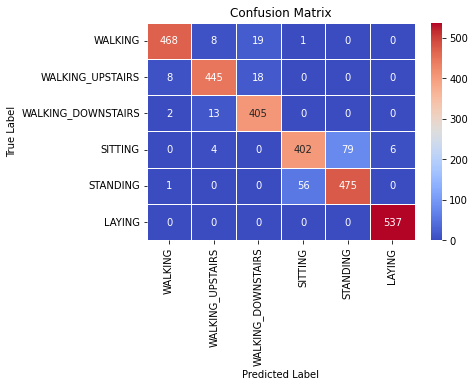

In [ ]:

# Print confusion matrix for training data
y_pred_train = model.predict(X_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#print(classification_report(trainy, max_y_pred_train))

# confusion matrix
LABELS = ['WALKING',
          'WALKING_UPSTAIRS',
          'WALKING_DOWNSTAIRS',
          'SITTING',
          'STANDING',
          'LAYING']
y_pred_test = model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(Y_test, axis=1)

matrix = metrics.confusion_matrix(max_y_test, max_y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix,
            cmap='coolwarm',
            linecolor='white',
            linewidths=1,
            xticklabels=LABELS,
            yticklabels=LABELS,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D, LSTM
from keras.layers import Permute, Reshape
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [ ]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [ ]:
# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded

In [ ]:
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    print('File Path : ',filepath)
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [ ]:
# load all train
X_train, Y_train = load_dataset_group('train', '/content/drive/MyDrive/uci-har dataset/UCI HAR Dataset/')
# load all test
X_test, Y_test = load_dataset_group('test', '/content/drive/MyDrive/uci-har dataset/UCI HAR Dataset/')

# zero-offset class values
Y_train = Y_train - 1
Y_test = Y_test - 1
# one hot encode y
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print('X_train.shape : ', X_train.shape)
print('Y_train.shape : ', Y_train.shape)
print('X_test.shape : ', X_test.shape)
print('Y_test.shape : ', Y_test.shape)

File Path :  /content/drive/MyDrive/uci-har dataset/UCI HAR Dataset/train/Inertial Signals/
File Path :  /content/drive/MyDrive/uci-har dataset/UCI HAR Dataset/test/Inertial Signals/
X_train.shape :  (7352, 128, 9)
Y_train.shape :  (7352, 6)
X_test.shape :  (2947, 128, 9)
Y_test.shape :  (2947, 6)


In [ ]:
n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]
n_outputs = Y_train.shape[1]

# reshape into subsequences (samples, time steps, rows, cols, channels)
n_steps, n_length = 4, 32

X_train = X_train.reshape((X_train.shape[0], n_steps, 1, n_length, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, 1, n_length, n_features))

In [ ]:
verbose = 1
epochs = 30
batch_size = 20

# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
hist = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), batch_size=batch_size, verbose=verbose)

# evaluate model
(loss, accuracy) = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=verbose)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

Epoch 1/30
368/368 [==============================] - 18s 41ms/step - loss: 0.3531 - accuracy: 0.8626 - val_loss: 0.5717 - val_accuracy: 0.8507
Epoch 2/30
368/368 [==============================] - 22s 61ms/step - loss: 0.1485 - accuracy: 0.9416 - val_loss: 0.3712 - val_accuracy: 0.9057
Epoch 3/30
368/368 [==============================] - 24s 65ms/step - loss: 0.1360 - accuracy: 0.9430 - val_loss: 0.4215 - val_accuracy: 0.8958
Epoch 4/30
368/368 [==============================] - 25s 69ms/step - loss: 0.1175 - accuracy: 0.9483 - val_loss: 0.4551 - val_accuracy: 0.8870
Epoch 5/30
368/368 [==============================] - 20s 53ms/step - loss: 0.1083 - accuracy: 0.9535 - val_loss: 0.5081 - val_accuracy: 0.9016
Epoch 6/30
368/368 [==============================] - 15s 41ms/step - loss: 0.1128 - accuracy: 0.9540 - val_loss: 0.4618 - val_accuracy: 0.8924
Epoch 7/30
368/368 [==============================] - 14s 39ms/step - loss: 0.0991 - accuracy: 0.9577 - val_loss: 0.5123 - val_accuracy:

93/93 [==============================] - 1s 6ms/step


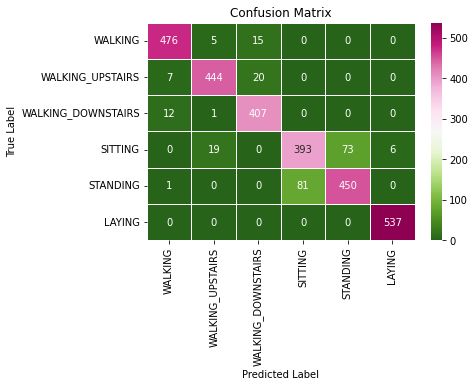

In [ ]:
# Print confusion matrix for training data
y_pred_train = model.predict(X_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#print(classification_report(trainy, max_y_pred_train))

# confusion matrix
LABELS = ['WALKING',
          'WALKING_UPSTAIRS',
          'WALKING_DOWNSTAIRS',
          'SITTING',
          'STANDING',
          'LAYING']
y_pred_test = model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(Y_test, axis=1)

matrix = metrics.confusion_matrix(max_y_test, max_y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix,
            cmap='PiYG_r',
            linecolor='white',
            linewidths=1,
            xticklabels=LABELS,
            yticklabels=LABELS,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter._experimental_lower_tensor_list_ops = False
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

# Save the model to disk
open("model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("model.tflite")
print("Model is %d bytes" % basic_model_size)


In [ ]:
# Compile the TensorFlow Lite model into a C source file
!xxd -i model.tflite > model.cc

# Create a header file from the C source file
!sed 's/unsigned/const unsigned/g' model.cc > model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

In [ ]:
import tensorflow_model_optimization as tfmot

pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
    initial_sparsity=0.0,
    final_sparsity=0.5,
    begin_step=0,
    end_step=1000
)

pruned_model = tfmot.sparsity.keras.prune_low_magnitude(model, pruning_schedule=pruning_schedule)
pruned_model.summary()

import tempfile

logdir = tempfile.mkdtemp()

callbacks = [
    sparsity.UpdatePruningStep(),
    sparsity.PruningSummaries(log_dir=logdir, profile_batch=0),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',min_lr=0.0001)

]
pruned_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
his = pruned_model.fit(X_train, y_train_encoded, epochs = 20, batch_size=32, callbacks=callbacks, validation_data= (X_test, y_test_encoded), verbose=1)


score = pruned_model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
# Compute end step to finish pruning after 450 epochs.
epochs = 20
end_step = np.ceil(1.0 * X_train.shape[1] / 20).astype(np.int32) * epochs
print(end_step)

# Define model for pruning by starting the model with 50% sparsity (50% zeros in weights) and end with 80% sparsity.
pruning_params = {
      'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.65,
                                                   final_sparsity=0.90,
                                                   begin_step=0,
                                                   end_step=end_step,
                                                   frequency=100)
}

# `prune_low_magnitude` requires a recompile
model_for_pruning = sparsity.prune_low_magnitude(model, **pruning_params)
model_for_pruning.summary()
adam = tf.keras.optimizers.Adam(
       learning_rate=0.0001,
       name="adam")
model_for_pruning.compile(
    loss=["mse"],
    optimizer= "adam",
    metrics=['accuracy'])

In [ ]:
import tempfile

logdir = tempfile.mkdtemp()

callbacks = [
    sparsity.UpdatePruningStep(),
    sparsity.PruningSummaries(log_dir=logdir, profile_batch=0),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',min_lr=0.0001)

]
his = model_for_pruning.fit(X_train, y_train_encoded, epochs = 20, batch_size=32, callbacks=callbacks, validation_data= (X_test, y_test_encoded), verbose=1)


score = model_for_pruning.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
score = model_for_pruning.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
pruned_model = sparsity.strip_pruning(pruned_model)
pruned_model.summary()

In [ ]:
pruned_model.compile(
    loss=["mse"],
    optimizer="adam",
    metrics=['accuracy']
)


In [ ]:
predictions_p = pruned_model.predict(X_test)
cm = tf.math.confusion_matrix(labels=tf.argmax(y_test_encoded, 1), predictions=tf.argmax(predictions_p, 1))
axis_labels = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
figure = plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues,xticklabels=axis_labels, yticklabels=axis_labels)
plt.tight_layout()
plt.ylim(len(cm)-0, 0)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np

for i, w in enumerate(pruned_model.get_weights()):
    print(
        "{} -- Total:{}, Zeros: {:.2f}%".format(
            pruned_model.weights[i].name, w.size, np.sum(w == 0) / w.size * 100
        )
    )

In [ ]:
# Convert pruned model to TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(pruned_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_lower_tensor_list_ops = False
tflite_pruned_model = converter.convert()

# Save the TFLite model to disk
with open('pruned_model.tflite', 'wb') as f:
    f.write(tflite_pruned_model)

# Print size of TFLite model
pruned_model_size = os.path.getsize("pruned_model.tflite")
print("Pruned model size: %d bytes" % pruned_model_size)

In [ ]:
# Compile the TensorFlow Lite model into a C source file
!xxd -i pruned_model.tflite > Pmodel.cc

# Create a header file from the C source file
!sed 's/unsigned/const unsigned/g' Pmodel.cc > Pmodel.h

import os
model_h_size = os.path.getsize("Pmodel.h")
print(f"Header file, Pmodel.h, is {model_h_size:,} bytes.")


In [ ]:
pruned_model.save('pruned_model.h5')

In [ ]:
# Define a function to generate representative data for quantization
def representative_data_gen():
  for input_value in np.array(X_train, dtype=np.float32):
    yield [input_value]

# Convert the Keras model to a TensorFlow Lite model with quantization
pruned_model = tf.keras.models.load_model('pruned_model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(pruned_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
pruned_quantized_tflite_model = converter.convert()

# Save the quantized model to disk
with open("models/pruned_quantized_model.tflite", "wb") as f:
    f.write(pruned_quantized_tflite_model)

# Check the size of the quantized model
quantized_model_size = os.path.getsize("models/pruned_quantized_model.tflite")
print("pruned_quantized_model is %d bytes" % quantized_model_size)